In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#import my modules
import acquire as a
import prepare as p



# for preparation state
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Plan

# Acquire

In [2]:
df = pd.read_csv('df1_loan.csv')

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [5]:
a.summarize(df)

Dataframe shape: 
(500, 15)
Dataframe head: 
   Unnamed: 0   Loan_ID Gender Married Dependents Education Self_Employed  \
0           0  LP001002   Male      No          0  Graduate            No   
1           1  LP001003   Male     Yes          1  Graduate            No   
2           2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History Property_Area Loan_Status Total_Income  
0             1.0         Urban           Y      $5849.0  
1             1.0         Rural           N      $6091.0  
2             1.0         Urban           Y      $3000.0  
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 # 

**Takeaways**
- there are 14 columns ( I will dropp unamed column)
- there are null values
-Total_income should be numeric
- rename columns

# Prepare 

In [6]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [7]:
#drop unnamed column
df = df.drop(columns= ['Unnamed: 0'])

In [8]:
#rename columns (lowercase)
df.columns = map(str.lower, df.columns)

In [9]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [10]:
df.total_income.dtype

dtype('O')

In [11]:
# change type of total_income
#we need to remove $
df['total_income']= df.total_income.replace({'\$':''}, regex = True).astype('float')

In [12]:
df['total_income'].head(2)

0    5849.0
1    6091.0
Name: total_income, dtype: float64

In [13]:
df.dependents.value_counts()

0     288
1      81
2      79
3+     40
Name: dependents, dtype: int64

In [14]:
#change type in dependents
df['dependents']= df.dependents.replace({'\+':''}, regex = True).astype('float')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            500 non-null    object 
 1   gender             491 non-null    object 
 2   married            497 non-null    object 
 3   dependents         488 non-null    float64
 4   education          500 non-null    object 
 5   self_employed      473 non-null    object 
 6   applicantincome    500 non-null    int64  
 7   coapplicantincome  500 non-null    float64
 8   loanamount         482 non-null    float64
 9   loan_amount_term   486 non-null    float64
 10  credit_history     459 non-null    float64
 11  property_area      500 non-null    object 
 12  loan_status        500 non-null    object 
 13  total_income       500 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 54.8+ KB


In [16]:
#checking missing values
table = p.miss_dup_values(df)
table

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
credit_history,41,8.2
self_employed,27,5.4
loanamount,18,3.6
loan_amount_term,14,2.8
dependents,12,2.4
gender,9,1.8
married,3,0.6


In [17]:
for i in table.index:
    print(i)
    print(df[i].value_counts())
    print('----------------')

credit_history
1.0    387
0.0     72
Name: credit_history, dtype: int64
----------------
self_employed
No     407
Yes     66
Name: self_employed, dtype: int64
----------------
loanamount
120.0    19
160.0    12
110.0    12
100.0    11
128.0     9
         ..
330.0     1
304.0     1
192.0     1
280.0     1
700.0     1
Name: loanamount, Length: 179, dtype: int64
----------------
loan_amount_term
360.0    415
180.0     35
480.0     12
300.0     12
240.0      3
120.0      3
84.0       2
60.0       2
12.0       1
36.0       1
Name: loan_amount_term, dtype: int64
----------------
dependents
0.0    288
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
gender
Male      400
Female     91
Name: gender, dtype: int64
----------------
married
Yes    322
No     175
Name: married, dtype: int64
----------------


I will fill nulls values
- credit_history : 0
- self_employed :0
- dependents : 0
- gender : most common Male
- married :0
- loan_term : most common 360

In [18]:
#fill the columns with 0
df[['credit_history','self_employed','dependents', 'married']] =df[['credit_history','self_employed','dependents', 'married']].fillna(0)

In [19]:
#fill gender
df.gender.fillna('Male', inplace = True)

In [20]:
#fill loan_amount_term
df.loan_amount_term.fillna(360, inplace = True)

In [21]:
#fill loanamount
df.loanamount.describe()

count    482.000000
mean     144.020747
std       82.344919
min       17.000000
25%      100.000000
50%      126.500000
75%      161.500000
max      700.000000
Name: loanamount, dtype: float64

In [22]:
p.miss_dup_values(df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
loanamount,18,3.6


for this I'm going to use simple imputer after the split ( I will use mean)

In [23]:
## change the type od the columns

In [24]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('----------------')

loan_id
LP001653    1
LP002500    1
LP001711    1
LP001647    1
LP001560    1
           ..
LP001702    1
LP002422    1
LP002524    1
LP001443    1
LP002116    1
Name: loan_id, Length: 500, dtype: int64
----------------
gender
Male      409
Female     91
Name: gender, dtype: int64
----------------
married
Yes    322
No     175
0        3
Name: married, dtype: int64
----------------
dependents
0.0    300
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
education
Graduate        393
Not Graduate    107
Name: education, dtype: int64
----------------
self_employed
No     407
Yes     66
0       27
Name: self_employed, dtype: int64
----------------
applicantincome
2500    8
2600    6
4166    5
4583    5
3750    5
       ..
5821    1
2750    1
2755    1
5829    1
3691    1
Name: applicantincome, Length: 415, dtype: int64
----------------
coapplicantincome
0.0       226
1666.0      5
2083.0      5
5625.0      3
1459.0      3
         ... 
1964.0      1
983.0    

In [25]:
# encode yes/no columns : loan_status, self_employed, married
df[['loan_status', 'self_employed', 'married']] = df[['loan_status', 'self_employed', 'married']].replace({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})

In [26]:
#encode gender female = 0 , male = 1
df.gender.replace({'Male': 1, 'Female': 0}, inplace = True)

In [27]:
for i in df.drop(columns = 'loan_id') .columns:
    print(i)
    print(df[i].value_counts())
    print('----------------')

gender
1    409
0     91
Name: gender, dtype: int64
----------------
married
1    322
0    178
Name: married, dtype: int64
----------------
dependents
0.0    300
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
education
Graduate        393
Not Graduate    107
Name: education, dtype: int64
----------------
self_employed
0    434
1     66
Name: self_employed, dtype: int64
----------------
applicantincome
2500    8
2600    6
4166    5
4583    5
3750    5
       ..
5821    1
2750    1
2755    1
5829    1
3691    1
Name: applicantincome, Length: 415, dtype: int64
----------------
coapplicantincome
0.0       226
1666.0      5
2083.0      5
5625.0      3
1459.0      3
         ... 
1964.0      1
983.0       1
830.0       1
1447.0      1
7250.0      1
Name: coapplicantincome, Length: 235, dtype: int64
----------------
loanamount
120.0    19
160.0    12
110.0    12
100.0    11
128.0     9
         ..
330.0     1
304.0     1
192.0     1
280.0     1
700.0     1
Na

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            500 non-null    object 
 1   gender             500 non-null    int64  
 2   married            500 non-null    int64  
 3   dependents         500 non-null    float64
 4   education          500 non-null    object 
 5   self_employed      500 non-null    int64  
 6   applicantincome    500 non-null    int64  
 7   coapplicantincome  500 non-null    float64
 8   loanamount         482 non-null    float64
 9   loan_amount_term   500 non-null    float64
 10  credit_history     500 non-null    float64
 11  property_area      500 non-null    object 
 12  loan_status        500 non-null    int64  
 13  total_income       500 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 54.8+ KB


In [29]:
#create dummies

In [30]:
dummy_df = pd.get_dummies(df[['education','property_area']])

In [31]:
dummy_df.head()

,education_Graduate,education_Not Graduate,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,0,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,0,1,0,0,1
4,1,0,0,0,1


In [32]:
#lowercase the columns
dummy_df.columns = map(str.lower, dummy_df.columns)

In [33]:
#concat 2dfs
df = pd.concat([df, dummy_df], axis=1).drop(columns = ['education', 'property_area','education_not graduate'])

In [34]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_status', 'total_income',
       'education_graduate', 'property_area_rural', 'property_area_semiurban',
       'property_area_urban'],
      dtype='object')

In [35]:
df.head()

,loan_id,gender,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income,education_graduate,property_area_rural,property_area_semiurban,property_area_urban
0,LP001002,1,0,0.0,0,5849,0.0,NaN,360.0,1.0,1,5849.0,1,0,0,1
1,LP001003,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,1,1,0,0
2,LP001005,1,1,0.0,1,3000,0.0,66.0,360.0,1.0,1,3000.0,1,0,0,1
3,LP001006,1,1,0.0,0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0,0,0,1
4,LP001008,1,0,0.0,0,6000,0.0,141.0,360.0,1.0,1,6000.0,1,0,0,1


In [36]:
#split

In [37]:
train, validate, test = p.split_data(df, 'loan_status')

complete df -> (500, 16)
train -> (280, 16)
validate -> (120, 16)
test -> (100, 16)


In [38]:
#checking missing values
p.miss_dup_values(train)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
loanamount,9,3.2


In [39]:
#using a function to impute the mean
train, validate, test = p.impute_mode(train, validate, test)

In [40]:
p.miss_dup_values(train)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


### PLOT VARIABLE DISTRIBUTIONS

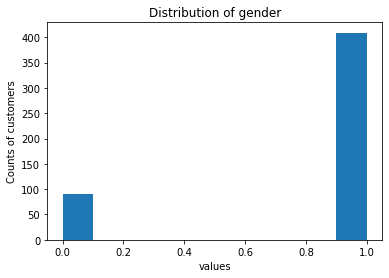

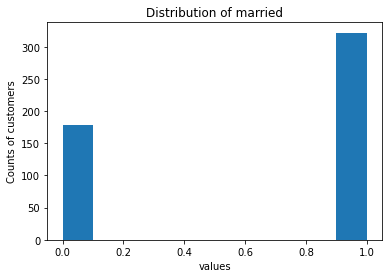

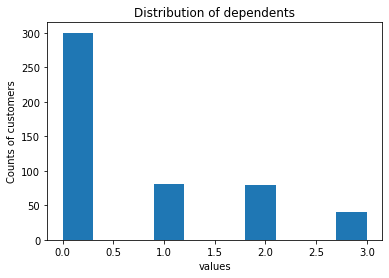

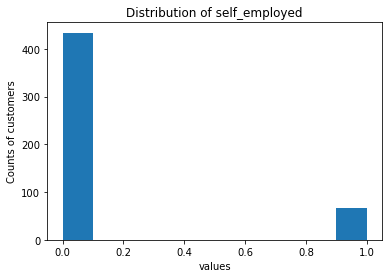

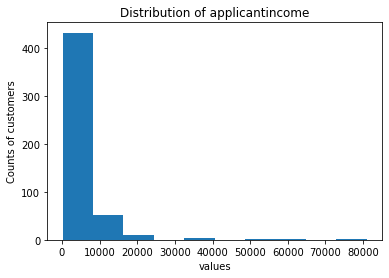

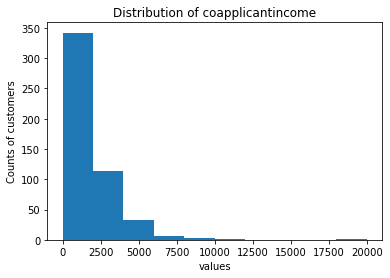

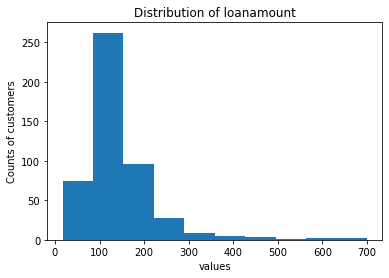

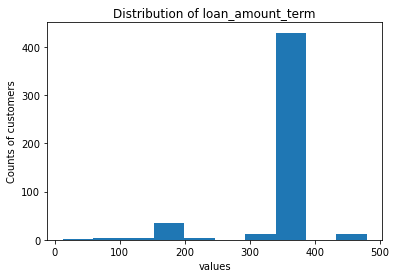

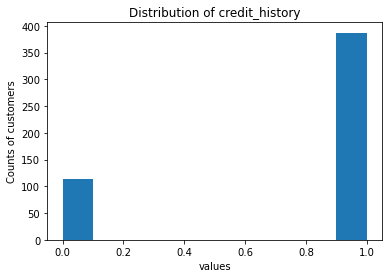

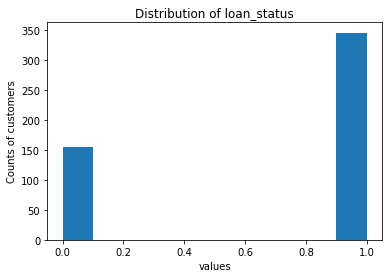

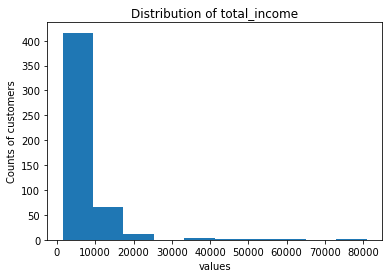

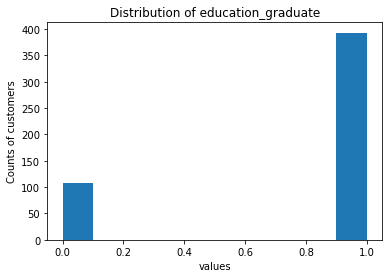

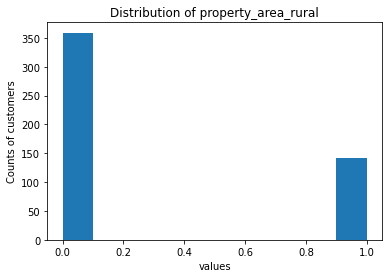

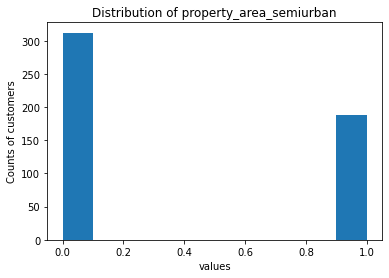

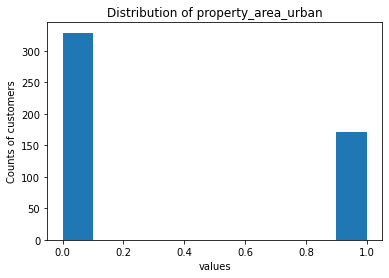

In [41]:
p.distribution(df)

Prepare :
- drop unnamed column
- rename columns(lowercase)
- remove $ and change type of total_income
- remove + and change type for dependents
    0 = no dependents
    1 = 1 dependents
    2 =  two dependents
    3 = three or more dependets
- fill nulls values

    - credit_history : 0
    - self_employed :0
    - dependents : 0
    - gender : most common Male
    - married :0
    - loan_term : most common 360
- encode loan_status, self_employed, married, gender
- create dummy  ('education', 'property_area) , drop 'education', 'property_area','education_not graduate']
- split into train, validate and test  Test is 20\% of the original dataset, validate is .30 \*.80= 24\% of the 
    original dataset, and train is .70\*.80= 56\% 

# Explore

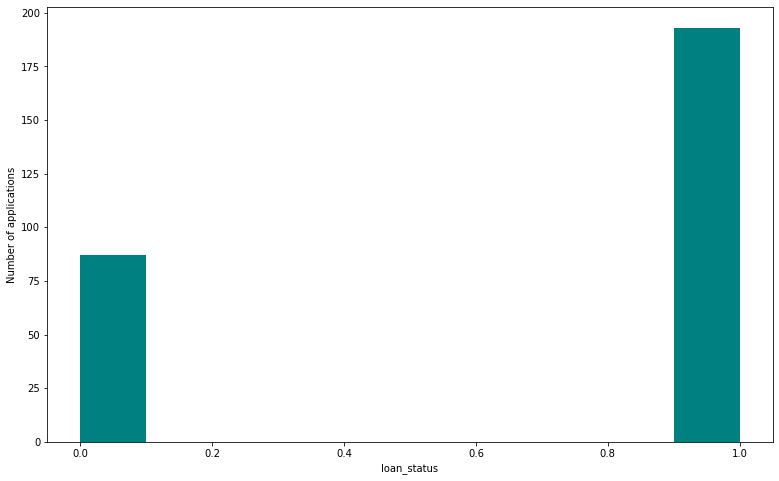

In [42]:
#  I want to start exploring  my target
plt.figure(figsize=(13, 8))
train['loan_status'].hist(grid=False, color = 'teal')
plt.xlabel("loan_status")
plt.ylabel("Number of applications")                               
#plt.xlim(-2 ,3)
plt.show()

In [43]:
train['loan_status'].mean()

0.6892857142857143

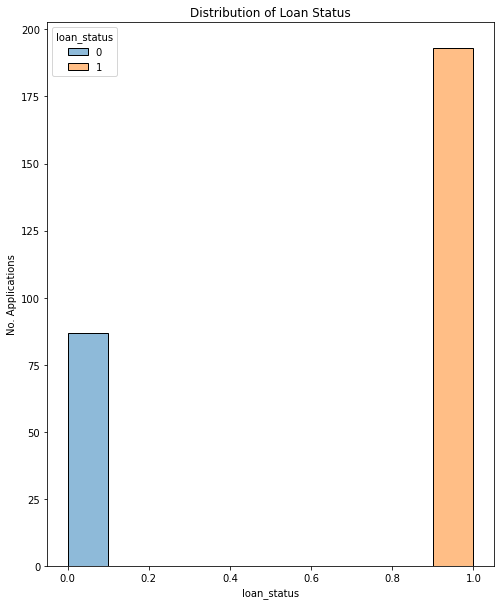

In [54]:
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['loan_status'],
                 hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('loan_status')
plt.ylabel('No. Applications')
plt.show()

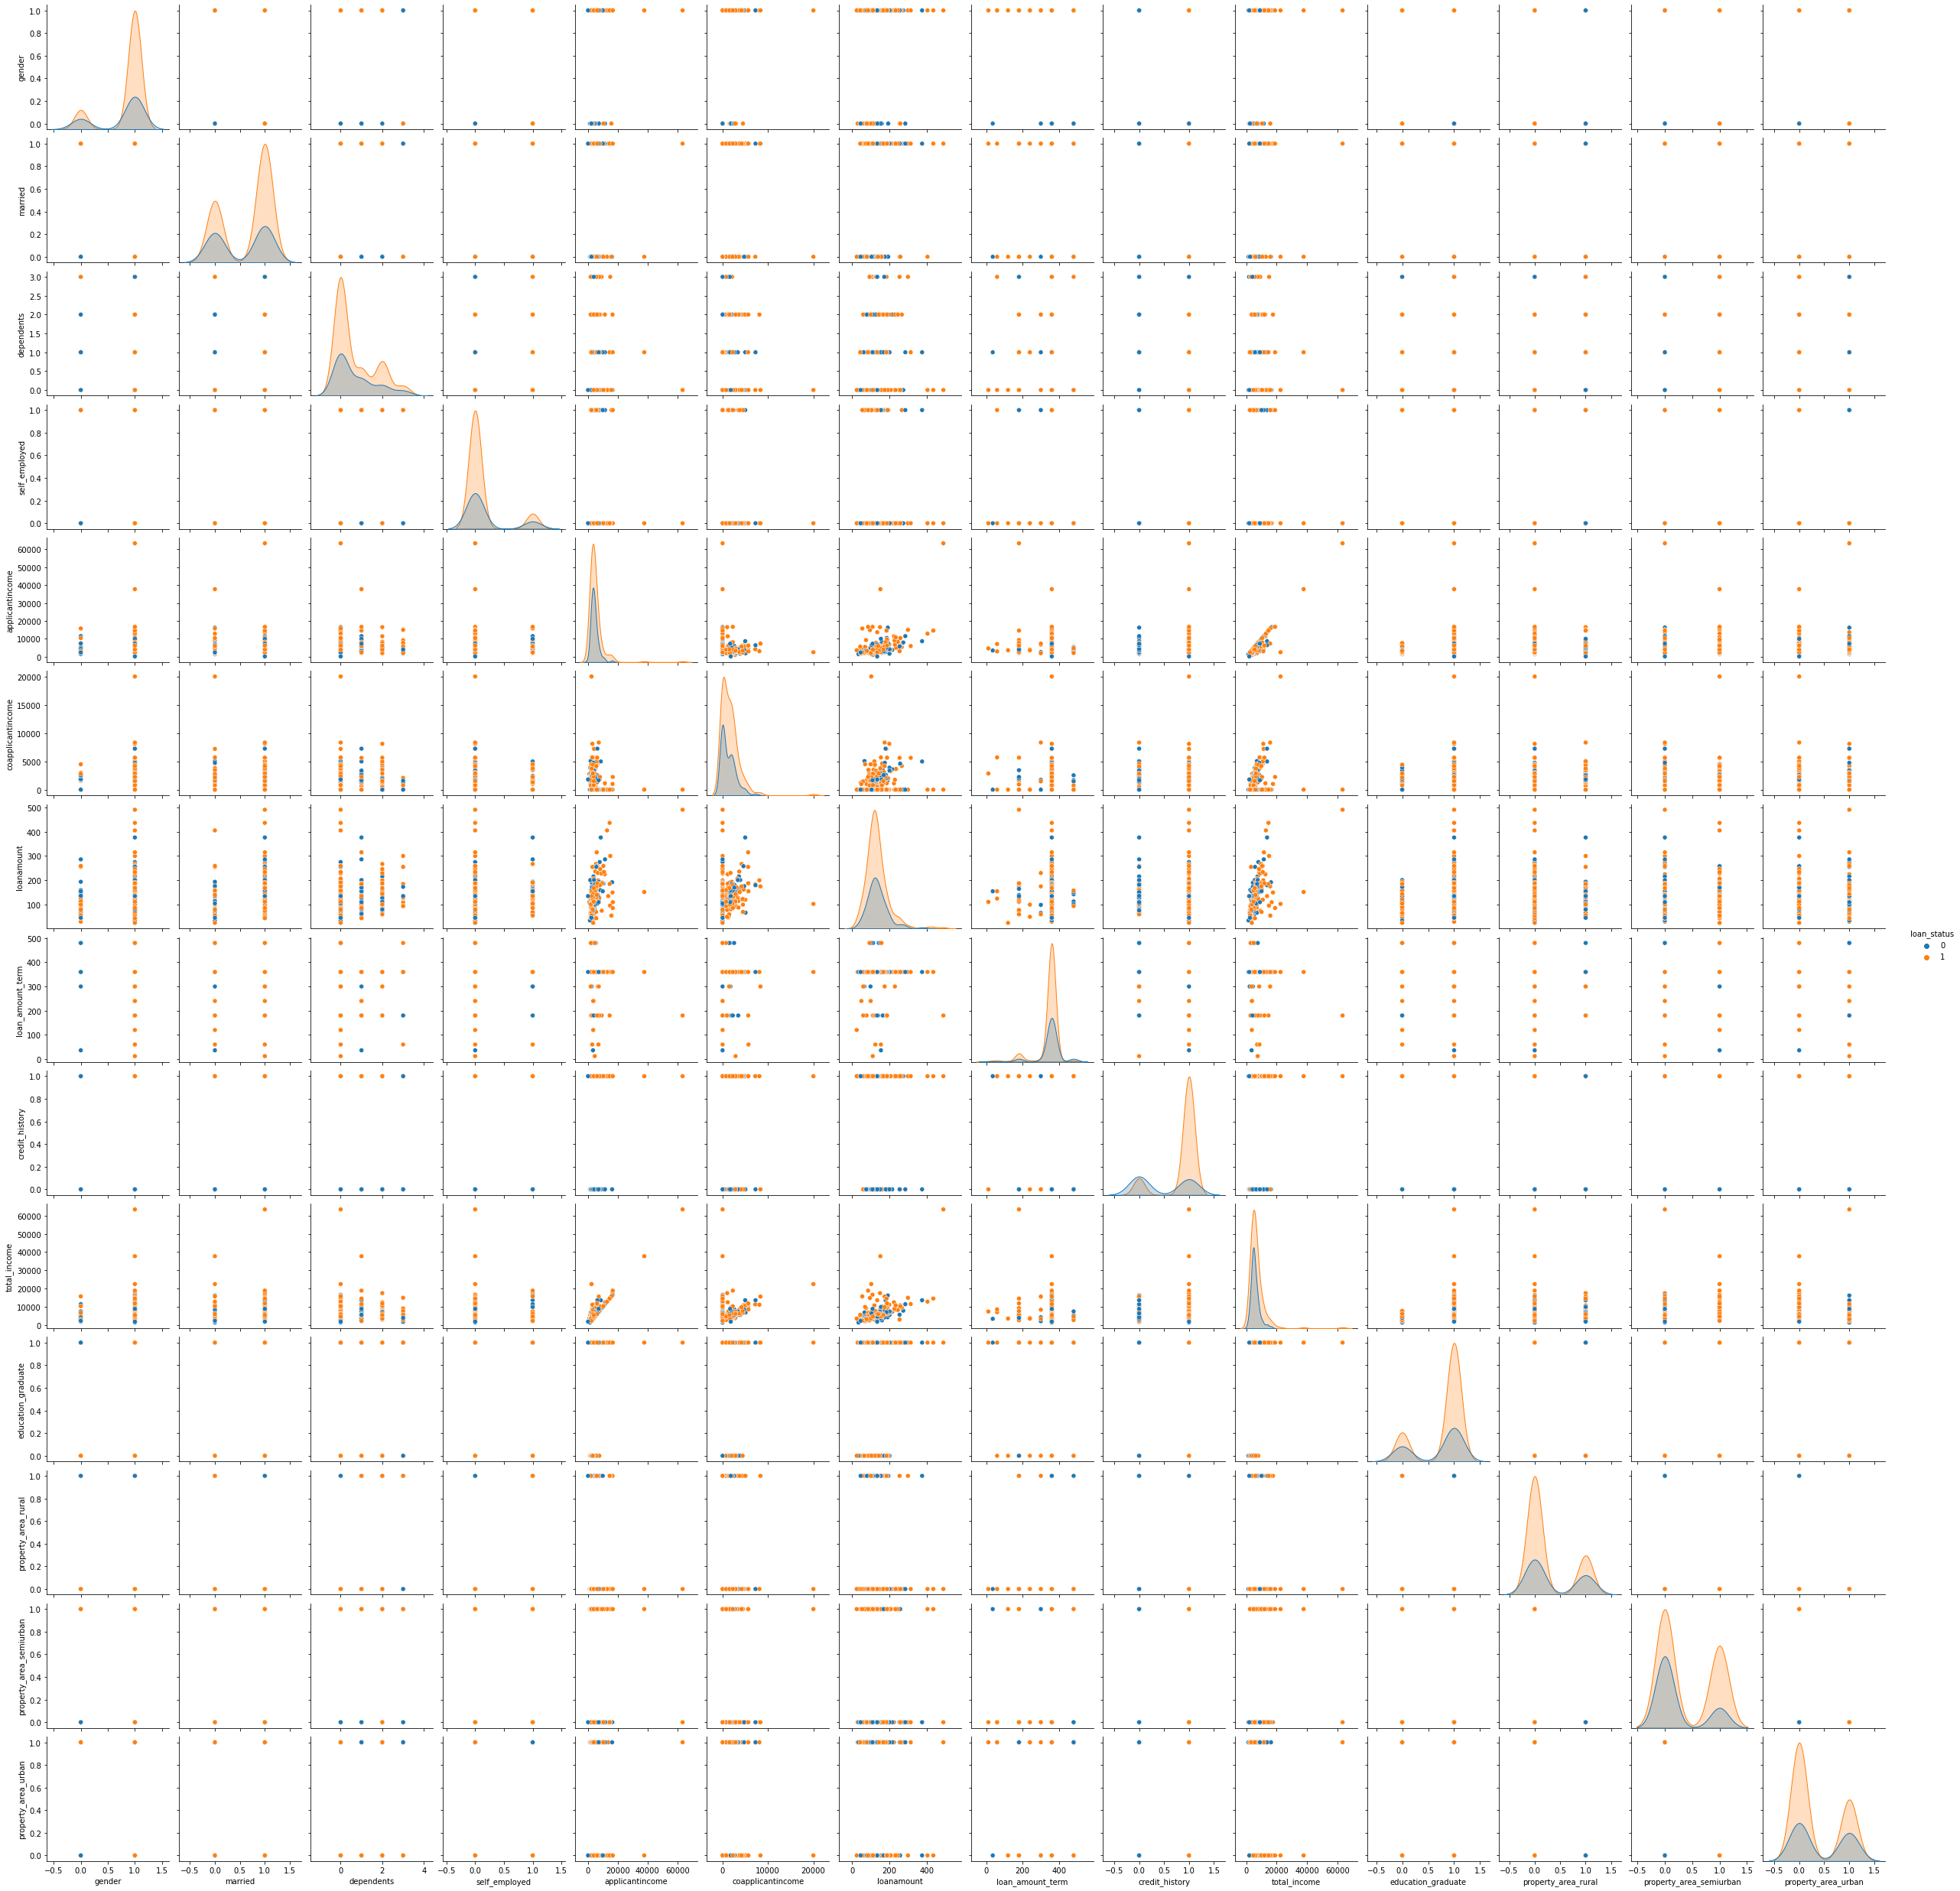